1021 Faster R-CNN 실습

In [4]:
import tensorflow as tf 
import cv2

In [14]:
img = tf.keras.utils.get_file('zebra.jpg', 'https://i.imgur.com/XjeiRMV.jpg')

In [15]:
im = cv2.imread(img)

In [16]:
import matplotlib.pyplot as plt  #opencv쓸거니까 

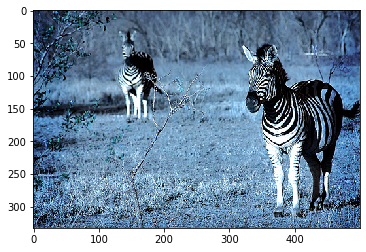

In [26]:
im = cv2.imread(img)
plt.imshow(im)

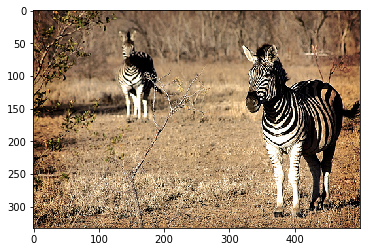

In [28]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [39]:
im_ = im.copy()  #원본이미지 카피 

In [40]:
i_r = cv2.rectangle(im, (120,25), (200,165), color=(255,0,0), thickness=2 )     

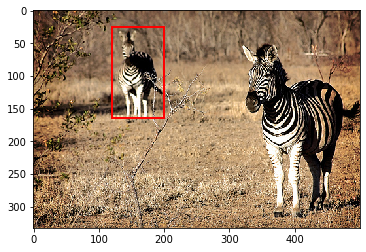

In [35]:
plt.imshow(i_r)  
#그림그릴 때 Mutable 연산하기 떄문에 원본카피놔야 함. 

In [64]:
rect1 = cv2. rectangle(im_, (120, 25), (200, 165), color=(255,0,0), thickness=2)
rect2 = cv2. rectangle(im_, (300, 50), (480, 320), color=(255,255,0), thickness=2)

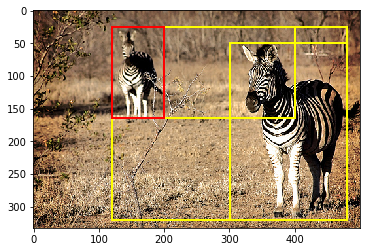

In [69]:
plt.imshow(im_)

In [70]:
im_.shape  

(333, 500, 3)

333 에서 800이 됨.    
500에서 800이 됨.     
[120 25 200 165]    
800 / 333 배만큼 곱한다.     

In [96]:
800/333 

2.4024024024024024

- image자체를 covolution layer에 집어넣어야 함. 그러기 위해서 크기를 맞춰야 한다.     
- 위치는 Resize 시 복원 가능하다.       
- Resize 하는 방식: 크기가 줄어들 때 어떻게 합하는가, 킄기가 클떄 어떻게 합하는 가 etc..     
- 가장많이 쓰는 방식 bicubic 방식    

In [66]:
h = w = 800  # 이미지르 800by800에 통과시키는 것으로 한다. 400by400도 괜찮음. 

In [67]:
for i in dir(cv2): 
    if 'INTER_' in i: 
        print(i)  # Resize 방식에 따라 성능이 바뀜 

INTER_AREA
INTER_BITS
INTER_BITS2
INTER_CUBIC
INTER_LANCZOS4
INTER_LINEAR
INTER_LINEAR_EXACT
INTER_MAX
INTER_NEAREST
INTER_NEAREST_EXACT
INTER_TAB_SIZE
INTER_TAB_SIZE2


In [88]:
im_r = cv2.resize(im, (h,w))
im_r_ = im_r.copy() #원본 카피해놓기 

TypeError: 'tuple' object is not callable

In [155]:
import numpy as np 

In [156]:
x = np.array([120, 25, 200, 126])
y = np.array([300, 50, 480, 320])

In [93]:
#x = x*int(h/im.shape[0])  
#x[0] = x[0]*int(w/im_.shape[1])
#x[1] = x[1]*int(h/im_.shape[0])
#x[2] = x[2]*int(w/im_.shape[1])
#x[3] = x[3]*int(h/im_.shape[0])

In [157]:
im_r = cv2.resize(im, (h,w))
im_r_ = im_r.copy() #원본 카피해놓기 

In [119]:
x[0] = int(x[0]*(w/im.shape[1]))  #120 
x[1] = int(x[1]*(h/im.shape[0]))  #25  
x[2] = int(x[2]*(w/im.shape[1])) #500
x[3] = int(x[3]*(h/im.shape[0])) #

In [158]:
y[0] = int(y[0]*(w/im.shape[1]))  #120 
y[1] = int(y[1]*(h/im.shape[0]))  #25  
y[2] = int(y[2]*(w/im.shape[1])) #500
y[3] = int(y[3]*(h/im.shape[0])) #

In [159]:
rect1 = cv2.rectangle(im_r_, (x[0], x[1]), (x[2], x[3]), color=(255,0,0), thickness=2)
rect2 = cv2.rectangle(im_r_, (y[0], y[1]), (y[2], y[3]), color=(255,255,0), thickness=2)

In [160]:
from skimage.util import view_as_blocks, view_as_windows 

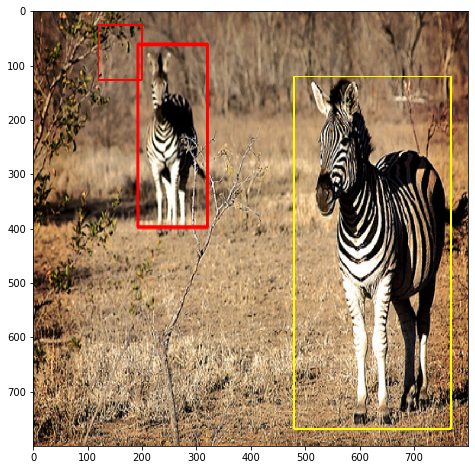

In [161]:
plt.figure(figsize=(8,8))  #800by800 이 50by50임 
plt.imshow(im_r_)

In [204]:
im_r = cv2.resize(im, (h,w))
im_r_ = im_r.copy() 

In [205]:
# 중점만 다 만들기 
x = np.arange(8, 800, 16)
y = np.arange(8, 800, 16)
#center_list = np.array(np.meshgrid(np.arange(8, 800, 16), np.arange(8, 800, 16))).T.reshape(-1,2) #16by16의 중점은 8임. 16칸 점프 
center_list = np.array(np.meshgrid(x,y)).T.reshape(-1,2)

In [206]:
center_list.shape   # 50by50이니까 2500번 

(2500, 2)

In [195]:
img_ = im.copy()

In [207]:
for i in range(2500): 
    cv2.circle(im_r_, (center_list[i,0], center_list[i,1]), 1, (255,0,0), thickness=2)
  #  cv2.circle(img_, (center_list[i,0], center_list[i,1]), 1, (255,0,0), thickness=2) 
    #x[0]: w / x[1]: h 

In [179]:
# 다른거 
for i in range(50): 
    cv2.circle(img_, (center_list[i,0], center_list[i,1]),1, (255,0,0), thickness=2)

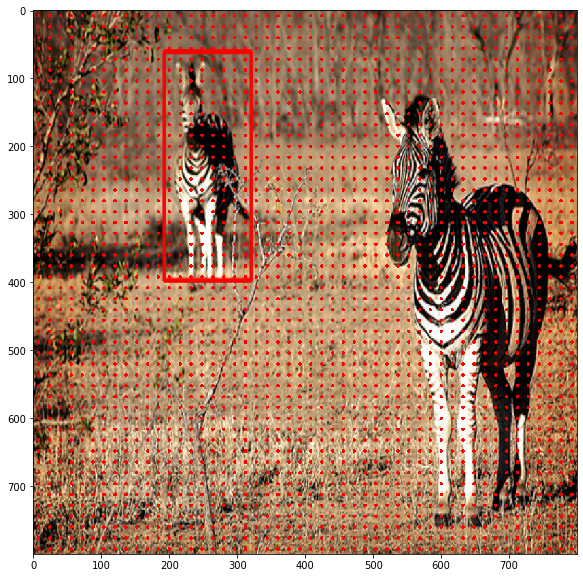

In [208]:
plt.figure(figsize=(10,10))
plt.imshow(im_r_)

In [213]:
ratio = [0.5, 1, 2]
scale = [8, 16, 32]

In [ ]:
- 안에 계산해야하는 것이 22500개가 나오는 이유?  2500*3*3 

In [219]:
pow   #제곱할거니까. 
pow(1,2)
pow(2,2)


3125

In [228]:
pow(pow(2,2), 1/2)  #Neumatrical technique 

2.0

In [214]:
for i in center_list: 
    cx, cy = i[0], i[1] 
    for r in ratio: 
        for s in scale:  
            h = pow(pow(s,2)/r, 0.5)
            w = h*r 
            print(h,w)
            

11.313708498984761 5.656854249492381
22.627416997969522 11.313708498984761
45.254833995939045 22.627416997969522
8.0 8.0
16.0 16.0
32.0 32.0
5.656854249492381 11.313708498984761
11.313708498984761 22.627416997969522
22.627416997969522 45.254833995939045
11.313708498984761 5.656854249492381
22.627416997969522 11.313708498984761
45.254833995939045 22.627416997969522
8.0 8.0
16.0 16.0
32.0 32.0
5.656854249492381 11.313708498984761
11.313708498984761 22.627416997969522
22.627416997969522 45.254833995939045
11.313708498984761 5.656854249492381
22.627416997969522 11.313708498984761
45.254833995939045 22.627416997969522
8.0 8.0
16.0 16.0
32.0 32.0
5.656854249492381 11.313708498984761
11.313708498984761 22.627416997969522
22.627416997969522 45.254833995939045
11.313708498984761 5.656854249492381
22.627416997969522 11.313708498984761
45.254833995939045 22.627416997969522
8.0 8.0
16.0 16.0
32.0 32.0
5.656854249492381 11.313708498984761
11.313708498984761 22.627416997969522
22.627416997969522 45.

In [222]:
anchor_list = np.zeros((22500,4)) #anchor 목록 초기화 

In [225]:
count = 0 
for i in center_list: 
    cx, cy = i[0], i[1]
    for r in ratio: 
        for s in scale: 
            h = pow(pow(s,2)/r, 0.5)
            w = h*r 
            h *=16  # h=h*16 
            w *=16 
            xmin = cx - 0.5*w 
            ymin = cy - 0.5*h 
            xmax = cx + 0.5*w 
            ymax = cy + 0.5*h 
            anchor_list[count] = [xmin, ymin, xmax, ymax]
            count += 1 
            

In [227]:
# 해당 앵커에서 그릴 수 있는 모든 기준을 계산해봤음. 
anchor_list 

array([[ -37.254834  ,  -82.50966799,   53.254834  ,   98.50966799],
       [ -82.50966799, -173.01933598,   98.50966799,  189.01933598],
       [-173.01933598, -354.03867197,  189.01933598,  370.03867197],
       ...,
       [ 701.49033201,  746.745166  ,  882.50966799,  837.254834  ],
       [ 610.98066402,  701.49033201,  973.01933598,  882.50966799],
       [ 429.96132803,  610.98066402, 1154.03867197,  973.01933598]])

In [229]:
anchor_list[1250]

array([-322.03867197,  434.98066402,  402.03867197,  797.01933598])

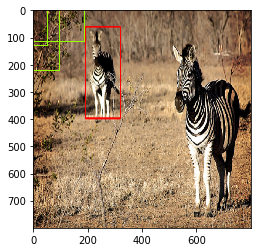

In [233]:
img_ = np.copy(im_r)
for i in range(15,20): 
    x_min = int(anchor_list[i][0])
    y_min = int(anchor_list[i][1])
    x_max = int(anchor_list[i][2])
    y_max = int(anchor_list[i][3])
    cv2.rectangle(img_, (x_min, y_min), (x_max, y_max), (150,255,0), thickness=2)
    plt.imshow(img_)

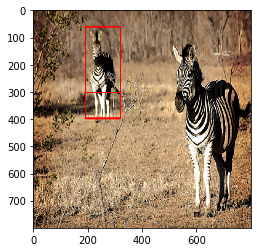

In [126]:
plt.imshow(im_r_)

- 800by800인데 연산하기 좋게 즉, layer통과할 때마다 크기가 달라진다. 
이걸 어떻게 아냐? 

In [141]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [144]:
# 위에 이해를 위해: 원본[1,800,800,5]을 집어넣으면 convolution이기에 최종 [1,25,25,512]으로 크기 작아짐
for i in vgg.layers: 
    output = tf.keras.models.Model(vgg.input, i.output)
    print(output(im_r[tf.newaxis]).shape)

(1, 800, 800, 3)
(1, 800, 800, 64)
(1, 800, 800, 64)
(1, 400, 400, 64)
(1, 400, 400, 128)
(1, 400, 400, 128)
(1, 200, 200, 128)
(1, 200, 200, 256)
(1, 200, 200, 256)
(1, 200, 200, 256)
(1, 100, 100, 256)
(1, 100, 100, 512)
(1, 100, 100, 512)
(1, 100, 100, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 25, 25, 512)


- 만약 (1,50,50,512) layer까지 사용한다면, 800-> 50으로 매핑시키는 것       
뒤에서부터 특정 layer를 쓰는 이유는 크기 맞추는 technique쓰기 위해서이다.      
- 왜? 전체 layer를 쓰면 어떤 자세한 값을 구할 수 있지만, 연산복잡도가 커지기 때문이다. 

In [127]:
vgg = tf.keras.applications.VGG16(include_top=False)

In [128]:
vgg(im_r_[tf.newaxis])

<tf.Tensor: shape=(1, 25, 25, 512), dtype=float32, numpy=
array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.14237618, ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.7231099 , ...,  0.        ,
           2.1115255 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           3.5494661 ,  0.        ],
         [ 0.        ,  0.        ,  2.582706  , ...,  0.        ,
           1.2787988 ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0. 

In [145]:
for j,i in enumerate(vgg.layers):  
    output = tf.keras.models.Model(vgg.input, i.output)
    print(output(im_r_[tf.newaxis]).shape)

(1, 800, 800, 3)
(1, 800, 800, 64)
(1, 800, 800, 64)
(1, 400, 400, 64)
(1, 400, 400, 128)
(1, 400, 400, 128)
(1, 200, 200, 128)
(1, 200, 200, 256)
(1, 200, 200, 256)
(1, 200, 200, 256)
(1, 100, 100, 256)
(1, 100, 100, 512)
(1, 100, 100, 512)
(1, 100, 100, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 50, 50, 512)
(1, 25, 25, 512)


In [148]:
from skimage.util import view_as_blocks, view_as_windows 

In [149]:
rect1 = cv2.rectangle(im_r_, (x[0], x[1]), (x[2], x[3]), color=(255,0,0), thickness=2)
rect2 = cv2.rectangle(im_r_, (y[0], y[1]), (y[2], y[3]), color=(255,255,0), thickness=2)

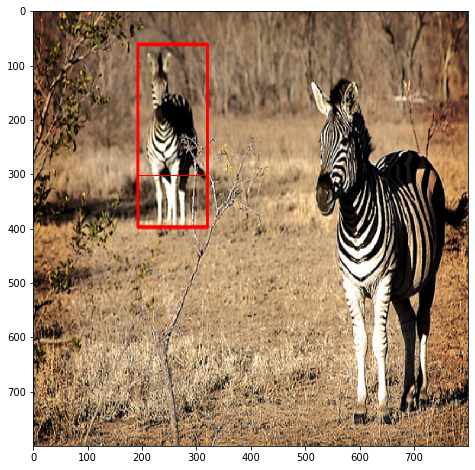

In [150]:
plt.figure(figsize=(8,8))  #800by800 이 50by50임 
plt.imshow(im_r_)


1022 수업내용

In [234]:
ratio = [0.5, 1, 2]
scale = [8,16,32]

In [236]:
al = np.zeros((22500,4))
count = 0
for i in center_list:
    cx, cy = i[0],i[1]
    for r in ratio:
        for s in scale:
            h = pow(pow(s,2)/r,0.5)
            w = h*r
            h *= 16
            w *= 16
            xmin = cx-0.5*w
            ymin = cy-0.5*h
            xmax = cx+0.5*w
            ymax = cy+0.5*h
            anchor_list[count] = [xmin, ymin,xmax,ymax]
            count += 1


In [237]:
al.shape

(22500, 4)

In [238]:
img_ = np.copy(im_r)
for i in range(point,point+9):
    x_min = int(al[i][0])
    y_min = int(al[i][1])
    x_max = int(al[i][2])
    y_max = int(al[i][3])
    cv2.rectangle(img_, (x_min,y_min),(x_max,y_max), (0,255,0), thickness=4)
for i in range(2500):
    cv2.circle(img_, (cl[i,0], cl[i,1]),1, (255,0,0), thickness=2)    

x = np.array([120, 25, 200, 165])
y = np.array([300, 50, 480,320])
x[0] = int(x[0]*(w/im_.shape[1]))
x[1] = int(x[1]*(h/im_.shape[0]))
x[2] = int(x[2]*(w/im_.shape[1]))
x[3] = int(x[3]*(h/im_.shape[0]))
y[0] = int(y[0]*(w/im_.shape[1]))
y[1] = int(y[1]*(h/im_.shape[0]))
y[2] = int(y[2]*(w/im_.shape[1]))
y[3] = int(y[3]*(h/im_.shape[0]))
rec1 = cv2.rectangle(img_, (x[0],x[1]),(x[2],x[3]), color=(255,0,0), thickness=5)
rec2 = cv2.rectangle(img_, (y[0],y[1]),(y[2],y[3]), color=(255,0,0), thickness=5)    
plt.imshow(img_)    

NameError: name 'point' is not defined

In [134]:
backbone = tf.keras.models.Model(vgg.input, vgg.layers[17].output)

In [140]:
backbone(im_r_[tf.newaxis]).shape

TensorShape([1, 50, 50, 512])